# Libraries & Seed

In [1]:
import numpy as np
np.random.seed(0)
import numpy.random as rng

import os
import pickle
from itertools import permutations
from itertools import product
from itertools import chain
from sklearn.utils import shuffle
import sys
import importlib
import statistics
import csv
import time
import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Parameters

In [2]:
img_width = 237
img_height = 80
data = "Rode/close/test"
data_path = "%s%s/" % ("./data/", data)

# Load Model


In [3]:
from Model import get_triplet_network, get_embedding_cnn
model = get_triplet_network((img_height, img_width, 1))
embedding_cnn = get_embedding_cnn((img_height, img_width, 1))

# Load Testing Data from Pickle File

In [4]:
with open(os.path.join(data_path, "test.pickle"), "rb") as f:
    (X, n_samples) = pickle.load(f)

# t-SNE plots

### Before: Raw samples

(155, 18960)
KL divergence:  0.4957923889160156


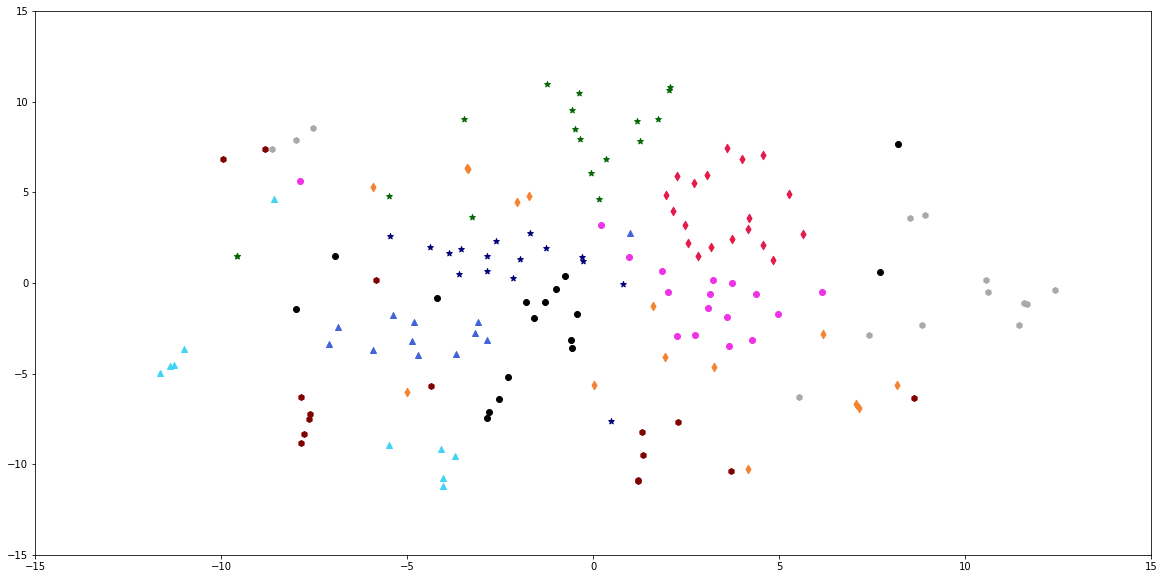

In [5]:
samples = []
labels = []

for i in range(X.shape[0]):
    for j in range(n_samples[i]):
        samples.append(X[i][j].reshape(img_width*img_height))
    labels += n_samples[i] * [i]

labels = np.asarray(labels)
samples = np.asarray(samples)

print(samples.shape)

tsne = TSNE(n_components=2, init='random', random_state=0, perplexity=30, n_iter=6000, learning_rate=1, early_exaggeration=65)

tsne_emb = tsne.fit_transform(samples)

print("KL divergence: ", tsne.kl_divergence_)

red = labels == 0
blue = labels == 1
green = labels == 2
grey = labels == 3
black = labels == 4
orange = labels == 5
cyan = labels == 6
navy = labels == 7
maroon = labels == 8
magenta = labels == 9

plt.figure(figsize=(20,10))
plt.scatter(tsne_emb[red, 0], tsne_emb[red, 1], marker='d', c="#e6194B", label='P09')
plt.scatter(tsne_emb[blue, 0], tsne_emb[blue, 1], marker='^', c="#4363d8", label='P10')
plt.scatter(tsne_emb[green, 0], tsne_emb[green, 1], marker='*', c="#006600", label='P15')
plt.scatter(tsne_emb[grey, 0], tsne_emb[grey, 1], marker='h', c="#a9a9a9", label='P18')
plt.scatter(tsne_emb[black, 0], tsne_emb[black, 1], marker='o', c="#000000", label='P20')
plt.scatter(tsne_emb[orange, 0], tsne_emb[orange, 1], marker='d', c="#f58231", label='P23')
plt.scatter(tsne_emb[cyan, 0], tsne_emb[cyan, 1], marker='^', c="#42d4f4", label='P29')
plt.scatter(tsne_emb[navy, 0], tsne_emb[navy, 1], marker='*', c="#000075", label='P31')
plt.scatter(tsne_emb[maroon, 0], tsne_emb[maroon, 1], marker='h', c="#800000", label='P42')
plt.scatter(tsne_emb[magenta, 0], tsne_emb[magenta, 1], marker='o', c="#f032e6", label='P44')
plt.xlim(-15, 15)
plt.ylim(-15, 15)

plt.savefig('./tsne_pre.pdf', bbox_inches = "tight") 

plt.show()

### After: Embedded samples

(155, 4096)
KL divergence:  0.3290661871433258


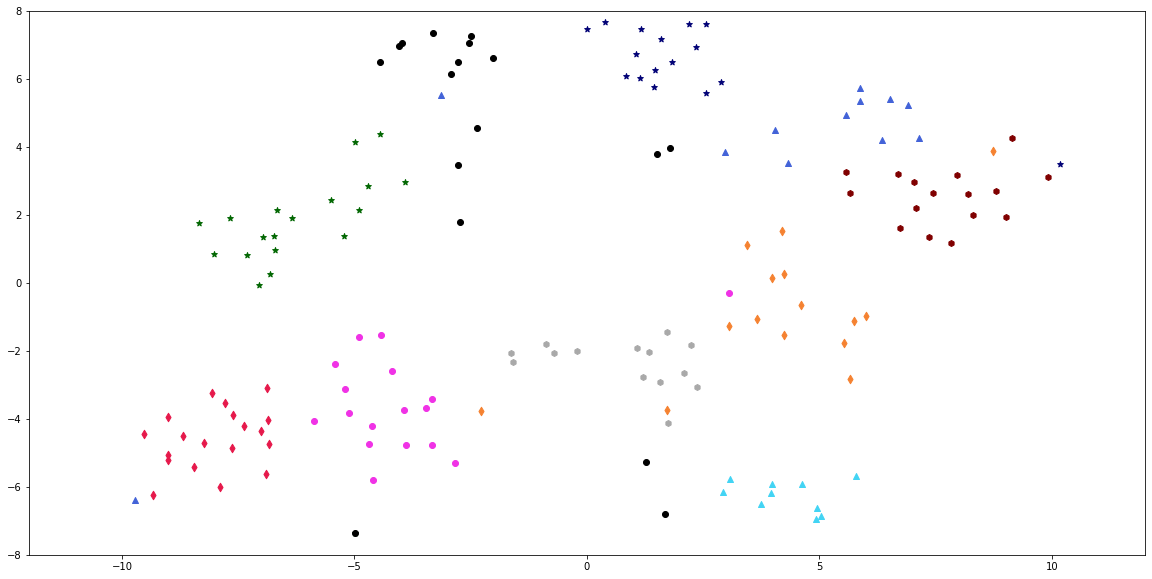

In [6]:
weights = os.path.expanduser("./weights_testing/rode_close/20201108_065654__Parameters_rode_close_weights.h5")

# Load weights
model.load_weights(weights)
embedding_cnn.set_weights(model.get_weights()) 

samples = []
labels = []

for i in range(X.shape[0]):
    for j in range(n_samples[i]):
        samples.append(embedding_cnn.predict(X[i][j].reshape(1, img_height, img_width, 1)))
    labels += n_samples[i] * [i]
    
labels = np.asarray(labels)
samples = np.asarray(samples)

temp = []
for i in range(len(samples)):
    temp.append(list(chain(*samples[i])))

samples = np.asarray(temp)

print(samples.shape)

tsne = TSNE(n_components=2, init='random', random_state=0, perplexity=30, n_iter=6000, learning_rate=1, early_exaggeration=65)
#tsne = TSNE(n_components=2, init='random', random_state=0, perplexity=30, n_iter=1000, learning_rate=200, early_exaggeration=150)

tsne_emb = tsne.fit_transform(samples)

print("KL divergence: ", tsne.kl_divergence_)

red = labels == 0
blue = labels == 1
green = labels == 2
grey = labels == 3
black = labels == 4
orange = labels == 5
cyan = labels == 6
navy = labels == 7
maroon = labels == 8
magenta = labels == 9

plt.figure(figsize=(20,10))
plt.scatter(tsne_emb[red, 0], tsne_emb[red, 1], marker='d', c="#e6194B", label='P09')
plt.scatter(tsne_emb[blue, 0], tsne_emb[blue, 1], marker='^', c="#4363d8", label='P10')
plt.scatter(tsne_emb[green, 0], tsne_emb[green, 1], marker='*', c="#006600", label='P15')
plt.scatter(tsne_emb[grey, 0], tsne_emb[grey, 1], marker='h', c="#a9a9a9", label='P18')
plt.scatter(tsne_emb[black, 0], tsne_emb[black, 1], marker='o', c="#000000", label='P20')
plt.scatter(tsne_emb[orange, 0], tsne_emb[orange, 1], marker='d', c="#f58231", label='P23')
plt.scatter(tsne_emb[cyan, 0], tsne_emb[cyan, 1], marker='^', c="#42d4f4", label='P29')
plt.scatter(tsne_emb[navy, 0], tsne_emb[navy, 1], marker='*', c="#000075", label='P31')
plt.scatter(tsne_emb[maroon, 0], tsne_emb[maroon, 1], marker='h', c="#800000", label='P42')
plt.scatter(tsne_emb[magenta, 0], tsne_emb[magenta, 1], marker='o', c="#f032e6", label='P44')
plt.xlim(-12, 12)
plt.ylim(-8, 8)

plt.savefig('./tsne_post.pdf', bbox_inches = "tight") 

plt.show()